Sorting Function: Insertion Sort, Size: 10, Time taken: 4.417001036927104e-06 seconds
Sorting Function: Selection Sort, Size: 10, Time taken: 4.958012141287327e-06 seconds
Sorting Function: Bubble Sort, Size: 10, Time taken: 5.124980816617608e-06 seconds
Sorting Function: Insertion Sort, Size: 50, Time taken: 2.3667002096772194e-05 seconds
Sorting Function: Selection Sort, Size: 50, Time taken: 3.100000321865082e-05 seconds
Sorting Function: Bubble Sort, Size: 50, Time taken: 5.354199674911797e-05 seconds
Sorting Function: Insertion Sort, Size: 100, Time taken: 9.420901187695563e-05 seconds
Sorting Function: Selection Sort, Size: 100, Time taken: 0.00010729199857451022 seconds
Sorting Function: Bubble Sort, Size: 100, Time taken: 0.00020004200632683933 seconds
Sorting Function: Insertion Sort, Size: 500, Time taken: 0.0021646669774781913 seconds
Sorting Function: Selection Sort, Size: 500, Time taken: 0.0025474170106463134 seconds
Sorting Function: Bubble Sort, Size: 500, Time taken: 0

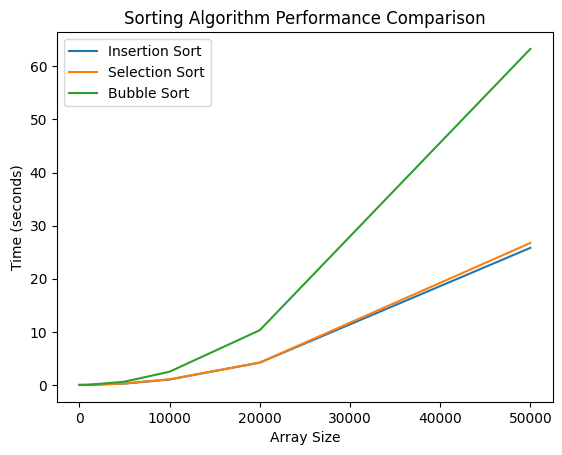

In [1]:
import random, timeit, matplotlib.pyplot as plt


class SortingAlgorithm:
    def __init__(self, name):
        self.name = name

    def sort(self, arr):
        raise NotImplementedError("Sort method not implemented")

    def measure_time(self, arr):
        start_time = timeit.default_timer()
        self.sort(arr.copy())
        return timeit.default_timer() - start_time


class InsertionSort(SortingAlgorithm):
    def __init__(self):
        super().__init__("Insertion Sort")

    def sort(self, arr):
        for i in range(1, len(arr)):
            key = arr[i]
            j = i - 1
            while j >= 0 and key < arr[j]:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key
        return arr


class SelectionSort(SortingAlgorithm):
    def __init__(self):
        super().__init__("Selection Sort")

    def sort(self, arr):
        for i in range(len(arr)):
            min_idx = i
            for j in range(i + 1, len(arr)):
                if arr[j] < arr[min_idx]:
                    min_idx = j
            arr[i], arr[min_idx] = arr[min_idx], arr[i]
        return arr


class BubbleSort(SortingAlgorithm):
    def __init__(self):
        super().__init__("Bubble Sort")

    def sort(self, arr):
        n = len(arr)
        for i in range(n):
            for j in range(0, n - i - 1):
                if arr[j] > arr[j + 1]:
                    arr[j], arr[j + 1] = arr[j + 1], arr[j]
        return arr


def main():
    # Create instances
    sort_algorithms = [InsertionSort(), SelectionSort(), BubbleSort()]

    # Benchmarking
    input_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 20000, 50000]
    timings = {alg.name: [] for alg in sort_algorithms}

    for size in input_sizes:
        array = [random.randint(1, 1000) for _ in range(size)]
        for algorithm in sort_algorithms:
            time_taken = algorithm.measure_time(array)
            print(
                f"Sorting Function: {algorithm.name}, Size: {size}, Time taken: {time_taken} seconds"
            )
            timings[algorithm.name].append(time_taken)

    # Plotting
    for name, times in timings.items():
        plt.plot(input_sizes, times, label=name)

    plt.xlabel("Array Size")
    plt.ylabel("Time (seconds)")
    plt.title("Sorting Algorithm Performance Comparison")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()
